In [1]:
import pandas as pd
import numpy as np
import requests
import json
from config import api_key
import flr_tools
import cme_tools
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime as dt
import scipy.stats as stats

In [2]:
start_date = "2010-01-01"
end_date = "2019-10-19"
#query_flr_url =f"https://api.nasa.gov/DONKI/FLR?startDate={start_date}&endDate={end_date}&api_key={api_key}"

In [3]:
dont_use_nasa_time_format = False
flare_alldf = flr_tools.flare_query_all(start_date, end_date, dont_use_nasa_time_format)
flare_alldf.head()

,class_type,end_time(zulu),flare_id,linked_events,peak_time(zulu),power(w/m^2),start_time(zulu)
0,B7.4,"04/03/2010, 10:58:00",2010-04-03T09:04:00-FLR-001,[{'activityID': '2010-04-03T09:54:00-CME-001'}],"04/03/2010, 09:54:00",7.400000e-07,"04/03/2010, 09:04:00"
1,M2.0,"06/12/2010, 01:02:00",2010-06-12T00:30:00-FLR-001,[None Found.],"06/12/2010, 00:57:00",2.000000e-05,"06/12/2010, 00:30:00"
2,M1.0,"08/07/2010, 18:47:00",2010-08-07T17:55:00-FLR-001,[None Found.],"08/07/2010, 18:24:00",1.000000e-05,"08/07/2010, 17:55:00"
3,C4.4,"08/14/2010, 10:31:00",2010-08-14T09:38:00-FLR-001,[{'activityID': '2010-08-14T12:30:00-SEP-001'}],"08/14/2010, 10:05:00",4.400000e-06,"08/14/2010, 09:38:00"
4,C4.5,"08/18/2010, 06:51:00",2010-08-18T04:45:00-FLR-001,[{'activityID': '2010-08-18T06:00:00-CME-001'}],"08/18/2010, 05:48:00",4.500000e-06,"08/18/2010, 04:45:00"


In [4]:
dont_use_nasa_time_format = False
cme_alldf = cme_tools.cme_query_all(start_date, end_date, dont_use_nasa_time_format)
cme_alldf.head()

,cme_id,speed,type,linked_events,start time
0,2010-04-03T09:54:00-CME-001,620,C,[{'activityID': '2010-04-03T09:04:00-FLR-001'}...,"04/03/2010, 09:54:00"
1,2010-06-13T07:32:00-CME-001,500,C,None,"06/13/2010, 07:32:00"
2,2010-06-20T03:18:00-CME-001,570,C,[{'activityID': '2010-06-23T08:00:00-IPS-001'}],"06/20/2010, 03:18:00"
3,2010-07-03T01:30:00-CME-001,625,C,None,"07/03/2010, 01:30:00"
4,2010-07-08T22:30:00-CME-001,290,S,None,"07/08/2010, 22:30:00"


In [5]:
use_nasa_time = True
flare_smalldf = flr_tools.flare_query_small(start_date, end_date, use_nasa_time)
flare_smalldf

,class_type,flare_id,peak_time(zulu),power(w/m^2)
0,B7.4,2010-04-03T09:04:00-FLR-001,2010-04-03T09:54Z,7.400000e-07
1,M2.0,2010-06-12T00:30:00-FLR-001,2010-06-12T00:57Z,2.000000e-05
2,M1.0,2010-08-07T17:55:00-FLR-001,2010-08-07T18:24Z,1.000000e-05
3,C4.4,2010-08-14T09:38:00-FLR-001,2010-08-14T10:05Z,4.400000e-06
4,C4.5,2010-08-18T04:45:00-FLR-001,2010-08-18T05:48Z,4.500000e-06
5,M2.9,2010-10-16T19:07:00-FLR-001,2010-10-16T19:12Z,2.900000e-05
6,M1.3,2011-01-28T00:44:00-FLR-001,2011-01-28T01:03Z,1.300000e-05
7,M1.9,2011-02-09T01:23:00-FLR-001,2011-02-09T01:31Z,1.900000e-05
8,M6.6,2011-02-13T17:28:00-FLR-001,2011-02-13T17:38Z,6.600000e-05
9,M2.2,2011-02-14T17:20:00-FLR-001,2011-02-14T17:26Z,2.200000e-05


In [6]:
query_cme_url =f"https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/CME?startDate={start_date}&endDate={end_date}"
cme_request = requests.get(query_cme_url).json()

In [7]:
#cme_request

In [8]:
cme_analysis_data = flr_tools.cme_analysis_df(cme_request)
cme_analysis_data.head()

,activity_id,data_level,half_angle,is_most_accurate,lat,long,note,speed,time21_5,type
0,2010-04-03T09:54:00-CME-001,0,26,True,7,8,,620,2010-04-03T17:16Z,C
1,2010-06-13T07:32:00-CME-001,0,30,True,17,117,,500,2010-06-13T16:42Z,C
2,2010-06-20T03:18:00-CME-001,0,20,True,-13,-80,,570,2010-06-20T07:00Z,C
3,2010-07-03T01:30:00-CME-001,0,23,True,-4,35,,625,2010-07-03T13:30Z,C
4,2010-07-08T22:30:00-CME-001,0,20,True,-15,126,,290,2010-07-09T07:30Z,S


In [9]:
flare_cme_combo_test = flr_tools.cme_compare(start_date, end_date)

In [10]:
flare_cme_combo_test.head()

,activity_id,class_type,data_level,end_time(zulu),flare_id,half_angle,is_most_accurate,lat,linked_events,long,note,peak_time(zulu),power(w/m^2),speed,start_time(zulu),time21_5,type
0,2010-04-03T09:54:00-CME-001,B7.4,0,"04/03/2010, 10:58:00",2010-04-03T09:04:00-FLR-001,26,True,7,2010-04-03T09:54:00-CME-001,8,,"04/03/2010, 09:54:00",7.400000e-07,620,"04/03/2010, 09:04:00",2010-04-03T17:16Z,C
1,2010-08-18T06:00:00-CME-001,C4.5,0,"08/18/2010, 06:51:00",2010-08-18T04:45:00-FLR-001,40,True,-30,2010-08-18T06:00:00-CME-001,97,,"08/18/2010, 05:48:00",4.500000e-06,1091,"08/18/2010, 04:45:00",2010-08-18T08:35Z,O
2,2011-02-15T02:25:00-CME-001,X2.2,0,"02/15/2011, 02:06:00",2011-02-15T01:44:00-FLR-001,35,True,-20,2011-02-15T02:25:00-CME-001,15,,"02/15/2011, 01:56:00",2.200000e-04,920,"02/15/2011, 01:44:00",2011-02-15T06:25Z,C
3,2011-02-24T08:00:00-CME-001,M3.5,0,"02/24/2011, 07:42:00",2011-02-24T07:23:00-FLR-001,22,True,-18,2011-02-24T08:00:00-CME-001,-100,,"02/24/2011, 07:35:00",3.500000e-05,900,"02/24/2011, 07:23:00",2011-02-24T12:10Z,C
4,2011-03-07T14:40:00-CME-001,M2.0,0,"03/07/2011, 15:08:00",2011-03-07T13:44:00-FLR-001,35,True,15,2011-03-07T14:40:00-CME-001,-13,,"03/07/2011, 14:30:00",2.000000e-05,710,"03/07/2011, 13:44:00",2011-03-07T19:52Z,C


In [11]:
len(flare_cme_combo_test)

188

In [12]:
cme_ids = cme_tools.linked_events(flare_alldf.rename(columns={'flare_id':'id'}),'CME')
flr_ids = cme_tools.linked_events(cme_alldf.rename(columns={'cme_id':'id'}),'FLR')
both = pd.DataFrame(cme_ids, columns=['flare_id','cme_id'])
new_df = both.merge(cme_alldf[["cme_id","speed","type","start time"]], on="cme_id", how='left')
new_df = new_df.rename(columns={"speed":"cme speed","type": "cme type", "start time": "cme start time"})
full_df = new_df.merge(flare_alldf[["flare_id","start_time(zulu)","peak_time(zulu)","end_time(zulu)","class_type","power(w/m^2)"]],
                      on="flare_id", how="left")
full_df = full_df.rename(columns={"start_time(zulu)":"flare start time","peak_time(zulu)": "flare peak time",
                                  "end_time(zulu)":"flare end time","class_type":"flare type","power(w/m^2)":"flare power(w/m^)"})
full_df.head()

,flare_id,cme_id,cme speed,cme type,cme start time,flare start time,flare peak time,flare end time,flare type,flare power(w/m^)
0,2010-04-03T09:04:00-FLR-001,2010-04-03T09:54:00-CME-001,620,C,"04/03/2010, 09:54:00","04/03/2010, 09:04:00","04/03/2010, 09:54:00","04/03/2010, 10:58:00",B7.4,7.400000e-07
1,2010-08-18T04:45:00-FLR-001,2010-08-18T06:00:00-CME-001,1091,O,"08/18/2010, 06:00:00","08/18/2010, 04:45:00","08/18/2010, 05:48:00","08/18/2010, 06:51:00",C4.5,4.500000e-06
2,2011-02-15T01:44:00-FLR-001,2011-02-15T02:25:00-CME-001,920,C,"02/15/2011, 02:25:00","02/15/2011, 01:44:00","02/15/2011, 01:56:00","02/15/2011, 02:06:00",X2.2,2.200000e-04
3,2011-02-24T07:23:00-FLR-001,2011-02-24T08:00:00-CME-001,900,C,"02/24/2011, 08:00:00","02/24/2011, 07:23:00","02/24/2011, 07:35:00","02/24/2011, 07:42:00",M3.5,3.500000e-05
4,2011-03-07T13:44:00-FLR-001,2011-03-07T14:40:00-CME-001,710,C,"03/07/2011, 14:40:00","03/07/2011, 13:44:00","03/07/2011, 14:30:00","03/07/2011, 15:08:00",M2.0,2.000000e-05


In [13]:
months_CME = []
months_SF = []

dates_CME = cme_alldf['start time']
dates_SF = flare_alldf['start_time(zulu)']

for date in dates_CME:
    months_CME.append(dt.strptime(date, '%m/%d/%Y, %H:%M:%S').strftime("%y-%m"))
    
for date in dates_SF:
    months_SF.append(dt.strptime(date, '%m/%d/%Y, %H:%M:%S').strftime("%y-%m"))

    
dates_CME = []
dates_SF = []

unique_months_CME = []
unique_months_SF = []

count_CME = []
count_SF = []

for month in months_CME:
    if month not in unique_months_CME:
        unique_months_CME.append(month)
        
for month in months_SF:
    if month not in unique_months_SF:
        unique_months_SF.append(month)
        
for month in unique_months_CME:
    count_CME.append(months_CME.count(month))
    
for month in unique_months_SF:
    count_SF.append(months_SF.count(month))
    
    
CME_dict = {'Month': unique_months_CME,
           'CME Count': count_CME}

SF_dict = {'Month': unique_months_SF,
          'SF Count': count_SF}

CME_count_df = pd.DataFrame(CME_dict)
SF_count_df = pd.DataFrame(SF_dict)

combined_count_df = pd.merge(left=CME_count_df, right=SF_count_df, how='outer')
combined_count_df.fillna(0, inplace=True) 

combined_count_df['SF Count'] = combined_count_df['SF Count'].astype(int)

combined_count_df.head()

,Month,CME Count,SF Count
0,10-04,1,1
1,10-06,2,1
2,10-07,4,0
3,10-08,11,3
4,10-09,5,0


In [14]:
combined_count_df.corr()


,CME Count,SF Count
CME Count,1.000000,0.596736
SF Count,0.596736,1.000000


NameError: name 'solar_flare_count' is not defined

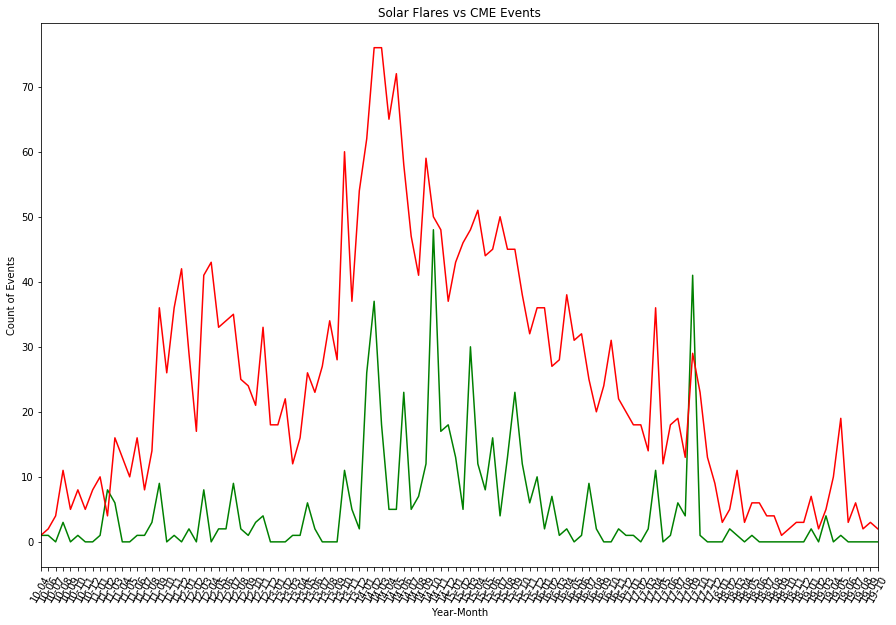

In [15]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(combined_count_df['Month'], combined_count_df['SF Count'], color='green')
ax.plot(combined_count_df['Month'], combined_count_df['CME Count'], color ='red')

dates = combined_count_df['Month'] #.apply(lambda x: dt.strptime(x,"%y-%m"))

ax.set_title('Solar Flares vs CME Events')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Count of Events')
ax.set_xticklabels(dates, rotation=60)
ax.set_xlim(dates[0],dates[-1:])
ax.legend(handles=[solar_flare_count, cme_count], loc="best")

years = mdates.YearLocator()
months = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b %d, %Y')

#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(fmt)
#ax.xaxis.set_minor_locator(months)

ax.set_yticks(np.arange(0,100,10))
ax.set_yticks(np.arange(0,100,5), minor=True)
ax.grid("--",which='major', alpha=0.5, linestyle='--')

In [ ]:
combined_count_df.corr()